In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sofifa.csv')
df.head()

,Unnamed: 0,Name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,Value,...,Total stats,Base stats,Skill moves,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Edition
0,0,L. Messi CF RW,27,93,95,FC Barcelona\n2004 ~ 2018,158023,"170cm 5'7""",72kg 159lbs,€100.5M,...,2163,453,4,93,88,86,96,27,63,FIFA 15
1,1,Cristiano Ronaldo LW ST LM,29,92,92,Real Madrid\n2009 ~ 2018,20801,"185cm 6'1""",80kg 176lbs,€79M,...,2215,469,5,93,93,81,91,32,79,FIFA 15
2,2,A. Robben RM LM RW,30,90,90,FC Bayern München\n2009 ~ 2017,9014,"180cm 5'11""",80kg 176lbs,€54.5M,...,2128,451,4,93,86,83,93,32,64,FIFA 15
3,3,M. Neuer GK,28,90,90,FC Bayern München\n2011 ~ 2019,167495,"193cm 6'4""",92kg 203lbs,€63.5M,...,1532,500,1,88,85,91,86,60,90,FIFA 15
4,4,Z. Ibrahimović ST,32,89,89,Paris Saint-Germain\n2012 ~ 2016,41236,"195cm 6'5""",95kg 209lbs,€34.5M,...,2134,452,4,76,90,81,85,34,86,FIFA 15


In [4]:
# plotting style
sns.set(style="whitegrid")

df = df.drop(columns=['Unnamed: 0'])
df.head()

,Name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,Value,Wage,...,Total stats,Base stats,Skill moves,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Edition
0,L. Messi CF RW,27,93,95,FC Barcelona\n2004 ~ 2018,158023,"170cm 5'7""",72kg 159lbs,€100.5M,€550K,...,2163,453,4,93,88,86,96,27,63,FIFA 15
1,Cristiano Ronaldo LW ST LM,29,92,92,Real Madrid\n2009 ~ 2018,20801,"185cm 6'1""",80kg 176lbs,€79M,€375K,...,2215,469,5,93,93,81,91,32,79,FIFA 15
2,A. Robben RM LM RW,30,90,90,FC Bayern München\n2009 ~ 2017,9014,"180cm 5'11""",80kg 176lbs,€54.5M,€275K,...,2128,451,4,93,86,83,93,32,64,FIFA 15
3,M. Neuer GK,28,90,90,FC Bayern München\n2011 ~ 2019,167495,"193cm 6'4""",92kg 203lbs,€63.5M,€300K,...,1532,500,1,88,85,91,86,60,90,FIFA 15
4,Z. Ibrahimović ST,32,89,89,Paris Saint-Germain\n2012 ~ 2016,41236,"195cm 6'5""",95kg 209lbs,€34.5M,€275K,...,2134,452,4,76,90,81,85,34,86,FIFA 15


In [6]:
# Data Cleaning

def val_to_numeric(value_str):
    if pd.isna(value_str):
        return np.nan
    value_str = str(value_str).replace('€', '')
    if 'M' in value_str:
        return float(value_str.replace('M', '')) * 1_000_000
    if 'K' in value_str:
        return float(value_str.replace('K', '')) * 1_000
    return float(value_str)

df['Value_num'] = df['Value'].apply(val_to_numeric)
df['Wage_num'] = df['Wage'].apply(val_to_numeric)

df['Height_cm'] = df['Height'].str.extract(r'(\d+)cm').astype(float)
df['Weight_kg'] = df['Weight'].str.extract(r'(\d+)kg').astype(float)

# separating 'Team' from 'Team & Contract' column
df['Team'] = df['Team & Contract'].str.split('\n').str[0].str.strip()

df['Overall rating'] = pd.to_numeric(df['Overall rating'], errors='coerce')
df['Potential'] = pd.to_numeric(df['Potential'], errors='coerce')

# dropping rows with null values in specific columns
df = df.dropna(subset=['Overall rating', 'Potential', 'Value_num', 'Team'])

In [7]:
df.head()

,Name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,Value,Wage,...,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Edition,Value_num,Wage_num,Height_cm,Weight_kg,Team
0,L. Messi CF RW,27,93.0,95.0,FC Barcelona\n2004 ~ 2018,158023,"170cm 5'7""",72kg 159lbs,€100.5M,€550K,...,86,96,27,63,FIFA 15,100500000.0,550000.0,170.0,72.0,FC Barcelona
1,Cristiano Ronaldo LW ST LM,29,92.0,92.0,Real Madrid\n2009 ~ 2018,20801,"185cm 6'1""",80kg 176lbs,€79M,€375K,...,81,91,32,79,FIFA 15,79000000.0,375000.0,185.0,80.0,Real Madrid
2,A. Robben RM LM RW,30,90.0,90.0,FC Bayern München\n2009 ~ 2017,9014,"180cm 5'11""",80kg 176lbs,€54.5M,€275K,...,83,93,32,64,FIFA 15,54500000.0,275000.0,180.0,80.0,FC Bayern München
3,M. Neuer GK,28,90.0,90.0,FC Bayern München\n2011 ~ 2019,167495,"193cm 6'4""",92kg 203lbs,€63.5M,€300K,...,91,86,60,90,FIFA 15,63500000.0,300000.0,193.0,92.0,FC Bayern München
4,Z. Ibrahimović ST,32,89.0,89.0,Paris Saint-Germain\n2012 ~ 2016,41236,"195cm 6'5""",95kg 209lbs,€34.5M,€275K,...,81,85,34,86,FIFA 15,34500000.0,275000.0,195.0,95.0,Paris Saint-Germain


# Exploratory Analysis

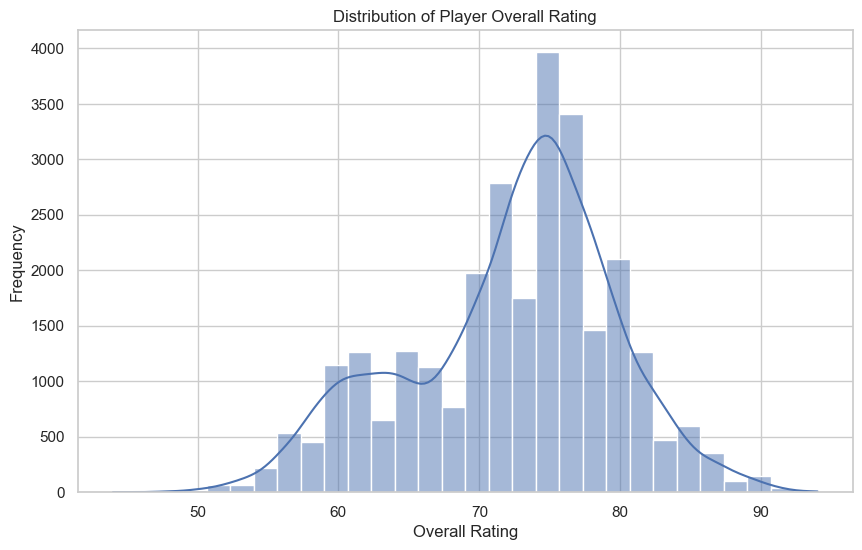

In [9]:
# Dist of Overall rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall rating'], bins=30, kde=True)
plt.title('Distribution of Player Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('overall_rating_distribution.png')

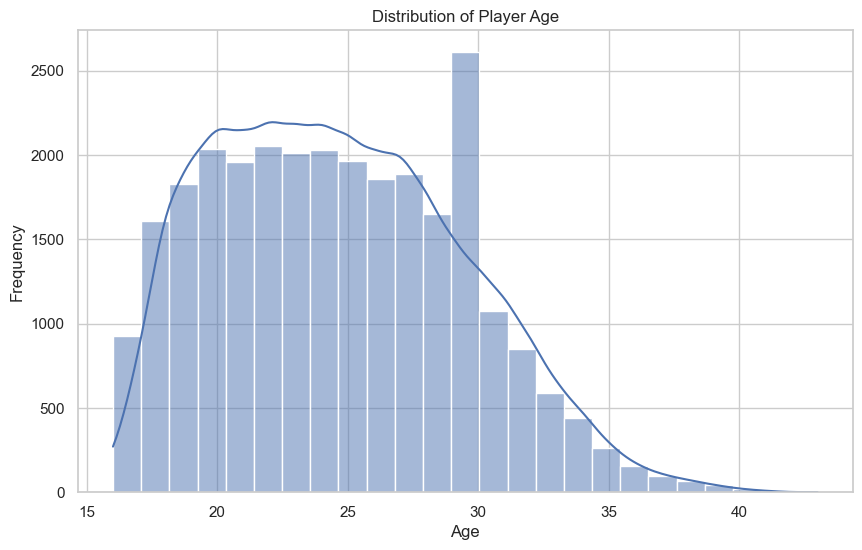

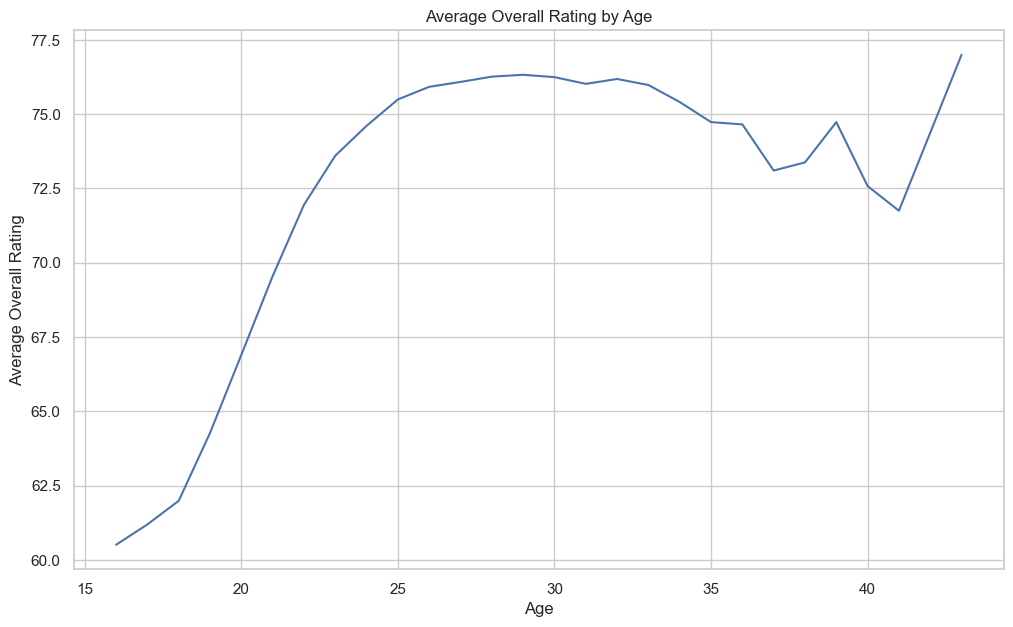

In [10]:
# Dist of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=25, kde=True)
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('age_distribution.png')

# Age vs. Overall Rating
plt.figure(figsize=(12, 7))
sns.lineplot(x='Age', y='Overall rating', data=df.groupby('Age')['Overall rating'].mean().reset_index())
plt.title('Average Overall Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')
plt.show()
#plt.savefig('rating_by_age.png')

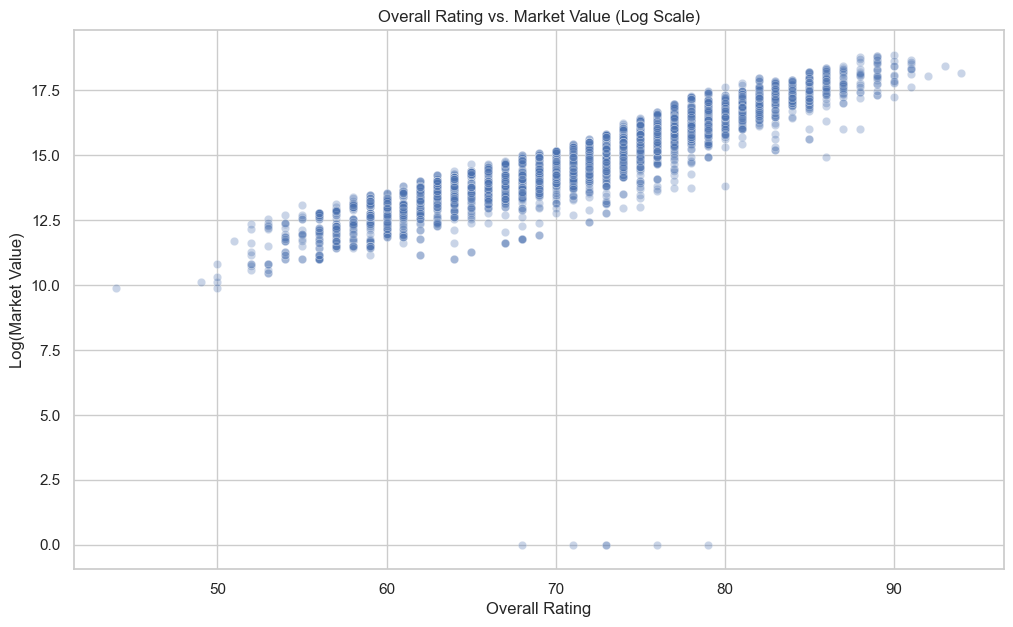

In [11]:
# Overall Rating vs. Market Value (log scale)
plt.figure(figsize=(12, 7))
# log scale for value to handle skewness and 0s
df['Value_num_log'] = np.log1p(df['Value_num']) 
sns.scatterplot(x='Overall rating', y='Value_num_log', data=df.sample(n=5000, random_state=1), alpha=0.3)
plt.title('Overall Rating vs. Market Value (Log Scale)')
plt.xlabel('Overall Rating')
plt.ylabel('Log(Market Value)')
plt.show()
#plt.savefig('rating_vs_value_log.png')

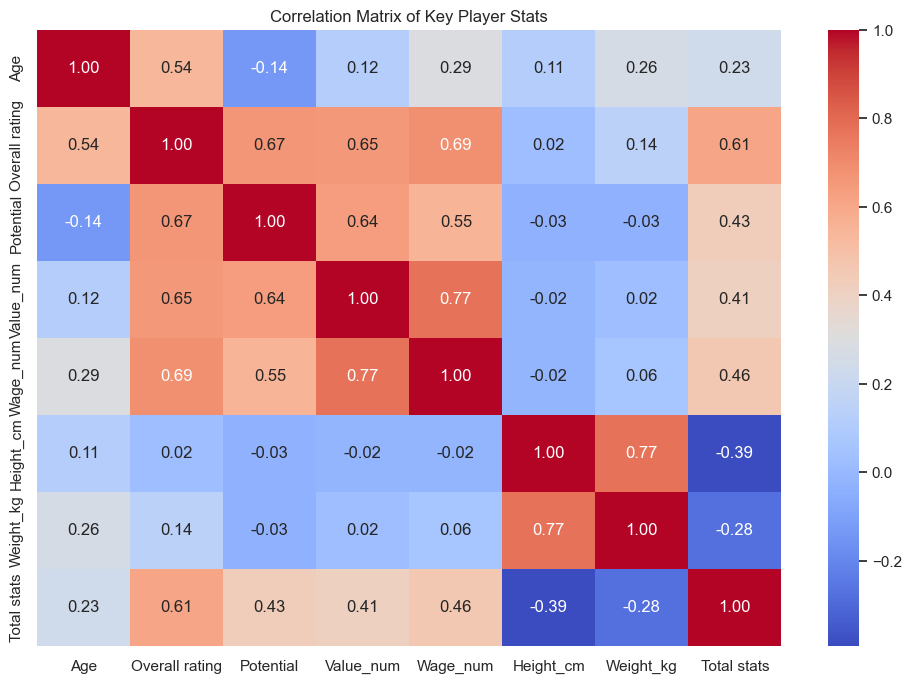

In [14]:
# Corr Heatmap
plt.figure(figsize=(12, 8))
corr_cols = ['Age', 'Overall rating', 'Potential', 'Value_num', 'Wage_num', 'Height_cm', 'Weight_kg', 'Total stats']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Player Stats')
plt.show()
#plt.savefig('correlation_heatmap.png')